# SEDS - HW 1 Learning Python with Jupyter notebook

We will start with data cleaning where we will import data to explore then will visualize for a brief overview. 

## Data Clean
Let's clean data first! 
### Importing data
Now import `panda`

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('../HCEPDB/HCEPDB_moldata.csv')

### Data exploration
Lets see whats in there by `head()` for a brief overview!

In [5]:
data.head() 

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [6]:
print(data.shape)

(2322849, 11)


This is to set index and figure out data types in each column!

In [7]:
data.set_index('id', inplace=True)

In [8]:
data.dtypes

SMILES_str         object
stoich_str         object
mass              float64
pce               float64
voc               float64
jsc               float64
e_homo_alpha      float64
e_gap_alpha       float64
e_lumo_alpha      float64
tmp_smiles_str     object
dtype: object

This is data summary!

In [9]:
data.describe()

,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06
mean,4.155640e+02,3.924612e+00,5.520989e-01,1.204695e+02,-5.173904e+00,1.881213e+00,-3.292690e+00
std,5.985317e+01,2.507639e+00,3.037830e-01,6.676970e+01,3.028554e-01,4.002805e-01,3.902608e-01
min,1.682378e+02,0.000000e+00,0.000000e+00,0.000000e+00,-7.512315e+00,-2.939619e-03,-6.086537e+00
25%,3.784536e+02,2.058252e+00,3.428861e-01,6.967192e+01,-5.367790e+00,1.588780e+00,-3.587081e+00
50%,4.155597e+02,3.419332e+00,5.405897e-01,1.119042e+02,-5.158766e+00,1.866297e+00,-3.280963e+00
75%,4.566924e+02,5.607110e+00,7.499653e-01,1.627444e+02,-4.966306e+00,2.161109e+00,-3.006803e+00
max,6.863590e+02,1.113013e+01,2.178957e+00,3.970383e+02,-3.632374e+00,3.803964e+00,-1.148421e+00


### Data manipulation with Variable `jsc` 
`jsc` is a countinous variable. 

In [10]:
pd.value_counts(data['jsc']) 

0.000000      60508
77.291785      6706
76.370102      6702
78.706568      6701
81.380891      6697
80.941730      6663
79.171246      6660
82.279867      6647
80.101376      6635
78.235096      6632
77.762059      6624
75.472806      6594
75.024985      6593
74.576507      6588
85.475998      6582
81.830779      6576
82.731840      6569
79.636066      6567
76.828261      6566
92.030673      6554
89.211346      6537
80.530634      6507
95.325067      6504
75.917576      6502
84.095930      6501
74.132525      6498
86.393990      6484
84.556320      6476
85.014628      6466
83.180631      6466
              ...  
2.612608          1
376.222544        1
386.195888        1
354.694695        1
362.798600        1
361.991904        1
363.857634        1
1.678275          1
396.315758        1
363.226677        1
378.659230        1
341.718239        1
365.046291        1
397.038024        1
2.016587          1
360.129591        1
377.184588        1
376.029176        1
344.939285        1


Now lets categorize the countinous data by 7 bins!

In [11]:
data['jsc_group'] = pd.cut(data['jsc'], 7)

In [12]:
data.head()

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,jsc_group
id,,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,"(56.72, 113.44]"
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,"(113.44, 170.159]"
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,"(170.159, 226.879]"
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,"(113.44, 170.159]"
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,"(113.44, 170.159]"


Using `value_counts` makes it easier to see how much each catergory has the number of values!

In [13]:
pd.value_counts(data['jsc_group'])

(56.72, 113.44]       779982
(113.44, 170.159]     614726
(-0.397, 56.72]       405710
(170.159, 226.879]    333823
(226.879, 283.599]    153074
(283.599, 340.319]     35206
(340.319, 397.038]       328
Name: jsc_group, dtype: int64

Here using `groupby` we can summarize with respect to each column. 

In [14]:
data.groupby(['jsc_group']).mean()

,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
jsc_group,,,,,,,
"(-0.397, 56.72]",378.625007,1.731500,0.694973,34.040355,-5.430995,2.360960,-3.070035
"(56.72, 113.44]",407.168859,3.258764,0.597674,84.800569,-5.195900,2.082688,-3.113212
"(113.44, 170.159]",427.190563,4.684934,0.516437,140.262379,-5.113911,1.734851,-3.379060
"(170.159, 226.879]",439.511087,5.701307,0.450507,195.439901,-5.047505,1.474132,-3.573373
"(226.879, 283.599]",447.638146,5.997175,0.376248,246.628235,-4.973442,1.251827,-3.721616
"(283.599, 340.319]",457.152966,4.834258,0.250848,299.549762,-4.846271,1.051133,-3.795138
"(340.319, 397.038]",475.185231,1.925321,0.085011,351.876033,-4.664191,0.807789,-3.856402


`describe()` shows us the summary statistics! 

In [15]:
data.groupby(['jsc_group']).describe()

e_gap_alpha                                          \
                         count      mean       std       min       25%   
jsc_group                                                                
(-0.397, 56.72]       405710.0  2.360960  0.429250 -0.002940  2.349963   
(56.72, 113.44]       779982.0  2.082688  0.123417  1.881400  1.975490   
(113.44, 170.159]     614726.0  1.734851  0.085828  1.581432  1.661744   
(170.159, 226.879]    333823.0  1.474132  0.067445  1.344732  1.417924   
(226.879, 283.599]    153074.0  1.251827  0.061025  1.125089  1.203483   
(283.599, 340.319]     35206.0  1.051133  0.059767  0.847115  1.016851   
(340.319, 397.038]       328.0  0.807789  0.035964  0.660678  0.789407   

                                                 e_homo_alpha            \
                         50%       75%       max        count      mean   
jsc_group                                                                 
(-0.397, 56.72]     2.445461  2.583469  3.803964     405710.0 -5.430995   
(56.72, 113.44]     2.076048  2.185049  2.317462     779982.0 -5.195900   
(113.44, 170.159]   1.736078  1.809104  1.881400     614726.0 -5.113911   
(170.159, 226.879]  1.479282  1.532963  1.581432     333823.0 -5.047505   
(226.879, 283.599]  1.258929  1.304824  1.344731     153074.0 -4.973442   
(283.599, 340.319]  1.065780  1.099275  1.125084      35206.0 -4.846271   
(340.319, 397.038]  0.819314  0.833683  0.846874        328.0 -4.664191   

                      ...          pce                  voc            \
                      ...          75%        max     count      mean   
jsc_group             ...                                               
(-0.397, 56.72]       ...     2.425598   6.262089  405710.0  0.694973   
(56.72, 113.44]       ...     4.218516   9.432855  779982.0  0.597674   
(113.44, 170.159]     ...     6.401999  10.850136  614726.0  0.516437   
(170.159, 226.879]    ...     7.830541  11.130131  333823.0  0.450507   
(226.879, 283.599]    ...     8.270212  10.965394  153074.0  0.376248   
(283.599, 340.319]    ...     6.877091   9.644962   35206.0  0.250848   
(340.319, 397.038]    ...     3.218210   5.094926     328.0  0.085011   

                                                                           
                         std  min       25%       50%       75%       max  
jsc_group                                                                  
(-0.397, 56.72]     0.399000  0.0  0.475336  0.753353  0.958376  2.178957  
(56.72, 113.44]     0.284595  0.0  0.404134  0.582536  0.780720  1.712886  
(113.44, 170.159]   0.261975  0.0  0.325535  0.514517  0.705794  1.277869  
(170.159, 226.879]  0.224919  0.0  0.292341  0.458225  0.617014  0.980210  
(226.879, 283.599]  0.176150  0.0  0.252067  0.392951  0.513772  0.743702  
(283.599, 340.319]  0.135034  0.0  0.152747  0.262330  0.358049  0.523145  
(340.319, 397.038]  0.070360  0.0  0.008305  0.079457  0.140459  0.229801  

[7 rows x 56 columns]

In [16]:
data.groupby(['jsc_group'])['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
jsc_group,,,,,,,,
"(-0.397, 56.72]",405710.0,378.625007,64.501675,169.2259,335.40610,376.4814,417.6199,636.4011
"(56.72, 113.44]",779982.0,407.168859,55.832543,168.2378,370.54400,406.3697,446.5526,637.5008
"(113.44, 170.159]",614726.0,427.190563,53.852563,218.2976,393.42490,428.4275,461.5319,686.3590
"(170.159, 226.879]",333823.0,439.511087,51.004894,234.3726,404.49720,443.6083,468.5838,637.5008
"(226.879, 283.599]",153074.0,447.638146,48.674197,262.4586,415.52230,449.5565,472.7634,637.5008
"(283.599, 340.319]",35206.0,457.152966,49.123225,280.3142,430.48960,453.6925,498.4987,636.4011
"(340.319, 397.038]",328.0,475.185231,42.373159,341.3969,444.67845,499.6657,513.6529,565.5830


## Data Visualization 
### Package `matplotib`
Now let's import `matplotib`. We will use a magic function `%`. 

In [18]:
import matplotlib
%matplotlib inline 

> Mass has the highest mean among variables. Except for `mass`, all other variables are hardly seen the values!

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5]),
 <a list of 10 Patch objects>)

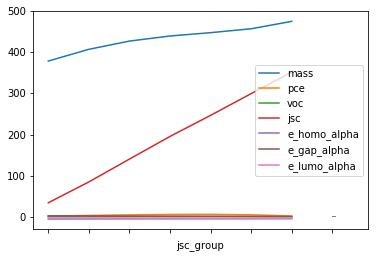

In [19]:
data.groupby(['jsc_group']).mean().plot().hist(7)  

> What the `hist()` function does? Let's try plotting without it. 

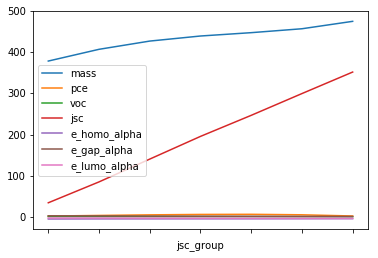

In [20]:
data.groupby(['jsc_group']).mean().plot() # wihtout hist(). 

Hmm, there is not much difference. 

> Notice! **This plot shows some variables have missing value** as the plot below indicates a lack of data count. We need to investigate! 

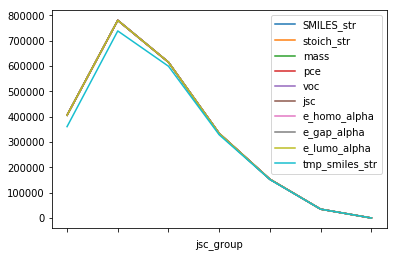

In [21]:
data.groupby(['jsc_group']).count().plot() 

Now we tried the simple plot. We will move onto the more detail about the plot in next sessions!